# **Exploration des données - Projet RANZCR CLiP - Catheter and Line Position Challenge**

In [7]:
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ast
from ast import literal_eval
import cv2
import shutil, random, os

In [8]:
# BASE_DIR est le path qui mène jusqu'aux csv "train.csv","train_annotations.csv". Ce path mène aussi jusqu'au dossier "train", qui contient
# les radiographies du train_set en format jpg
BASE_DIR = ""

### **Prévisualisation des données**

In [9]:
data = pd.read_csv(BASE_DIR + "train.csv",index_col=0)
data_annotated = pd.read_csv(BASE_DIR + "train_annotations.csv")

data.head()

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.26697628953273228189375557799582420561,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1.2.826.0.1.3680043.8.498.46302891597398758759818628675365157729,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
1.2.826.0.1.3680043.8.498.68286643202323212801283518367144358744,0,0,0,0,0,0,0,1,0,0,0,c31019814
1.2.826.0.1.3680043.8.498.10050203009225938259119000528814762175,0,0,0,0,0,0,0,0,0,1,0,207685cd1


In [10]:
data_annotated.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [11]:
#Colonnes et lignes
columns = data.columns
nb_rows = data.shape[0]

print("Les colonnes du dataset sont: {}".format(columns))
print("Le dataset contient {} lignes, chacune correspondant à une unique radiographie ".format(nb_rows))

Les colonnes du dataset sont: Index(['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal',
       'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal',
       'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
       'Swan Ganz Catheter Present', 'PatientID'],
      dtype='object')
Le dataset contient 30083 lignes, chacune correspondant à une unique radiographie 


### **Patients**

In [12]:
#Patients

patients_list= data["PatientID"].value_counts().rename_axis('PatientID').reset_index(name='Nombre de radiographies') 
nb_patients = patients_list.shape[0]

print("Le dataset contient des radios de {} différents patients".format(nb_patients))
print(patients_list)

Le dataset contient des radios de 3255 différents patients
      PatientID  Nombre de radiographies
0     05029c63a                      172
1     55073fece                      167
2     26da0d5ad                      148
3     8849382d0                      130
4     34242119f                      110
...         ...                      ...
3250  21d94906a                        1
3251  f2e813096                        1
3252  684622972                        1
3253  5a051bcec                        1
3254  64a676c8d                        1

[3255 rows x 2 columns]


In [13]:
#Afficher les labels de différentes radios d'un même patient
def print_patient_classes(PatientID):
    patient_example = data[data['PatientID']==PatientID]
    return patient_example.head()


print("Un unique patient peut avoir différentes radios, qui peuvent être classifiées différemment l'une par rapport à l'autre")

Un unique patient peut avoir différentes radios, qui peuvent être classifiées différemment l'une par rapport à l'autre


In [14]:
print_patient_classes('05029c63a')

,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
StudyInstanceUID,,,,,,,,,,,,
1.2.826.0.1.3680043.8.498.33289872132944517059685300521052847970,0,0,1,0,0,0,1,0,0,1,0,05029c63a
1.2.826.0.1.3680043.8.498.58815494070381425972841494897309562888,0,0,1,0,1,0,0,0,1,1,0,05029c63a
1.2.826.0.1.3680043.8.498.18423562395321282202151467283211883687,0,0,1,0,0,0,1,0,1,0,0,05029c63a
1.2.826.0.1.3680043.8.498.80010847260848855758249955549927520930,0,0,1,0,0,0,1,1,0,0,0,05029c63a
1.2.826.0.1.3680043.8.498.68620140014200110095088585785330951729,0,0,0,0,0,0,0,0,0,1,1,05029c63a


In [15]:
#On peut maintenant tracer un graphe montrant l'histogramme du nombre de radiographies par patient

idCounts = data['PatientID'].value_counts().reset_index()
idCounts.columns = ['PatientID', 'Nombre de radiographies']
idCounts = idCounts.sort_values(by = 'Nombre de radiographies', ascending = False)
idCounts.head()

,PatientID,Nombre de radiographies
0,05029c63a,172
1,55073fece,167
2,26da0d5ad,148
3,8849382d0,130
4,34242119f,110


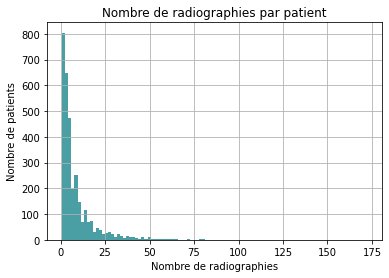

In [16]:
hist=idCounts.hist(bins=100,color='#499fa4')
plt.title('Nombre de radiographies par patient')
plt.xlabel("Nombre de radiographies")
plt.ylabel('Nombre de patients')
plt.show()

### **Répartition des labels au sein du dataset**

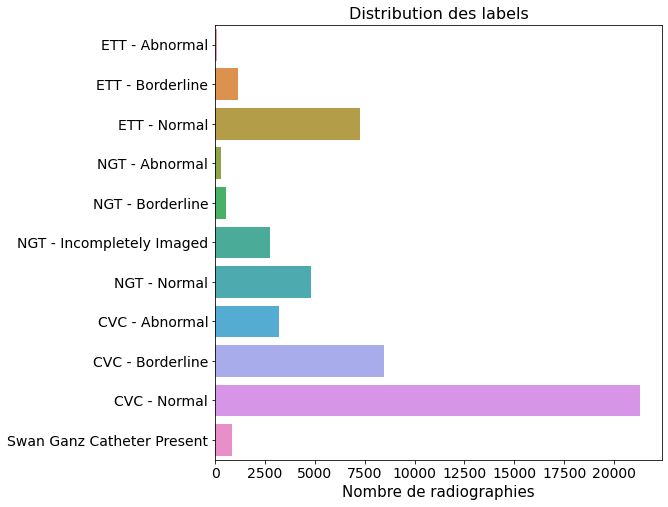

In [17]:
# On trace d'abord la répartition "brute" des classes au sein du dataset

plt.figure(figsize=(8, 8))
df_tmp = data.iloc[:, :-1].sum()
sns.barplot(x=df_tmp.values, y=df_tmp.index)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Nombre de radiographies", fontsize=15)
plt.title("Distribution des labels", fontsize=16);

In [18]:
# On regroupe maintenant les données par type de cathéter, afin de visualiser lesquels sont le plus présents dans nos données
cols_dict = {'ETT' : ['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal'],
             'NGT' : ['NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal'],
             'CVC' : [ 'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal'],
             'SGC' : ['Swan Ganz Catheter Present']}
counts_dict = {}

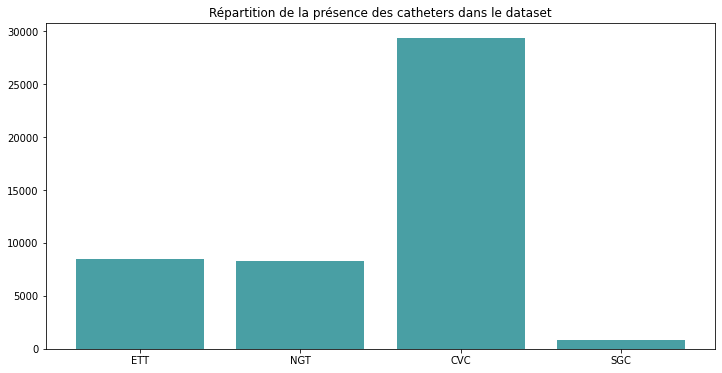

In [19]:
for proc in cols_dict.keys():
    counts_dict[proc] = data[data[cols_dict[proc]].sum(axis=1) > 0].shape[0]


plt.figure(figsize=[12, 6])
plt.bar(height=counts_dict.values(),x=counts_dict.keys(),color="#499fa4")
plt.title("Répartition de la présence des catheters dans le dataset")
plt.show()

## **Données annotées**

### **Répartition des données annotées**

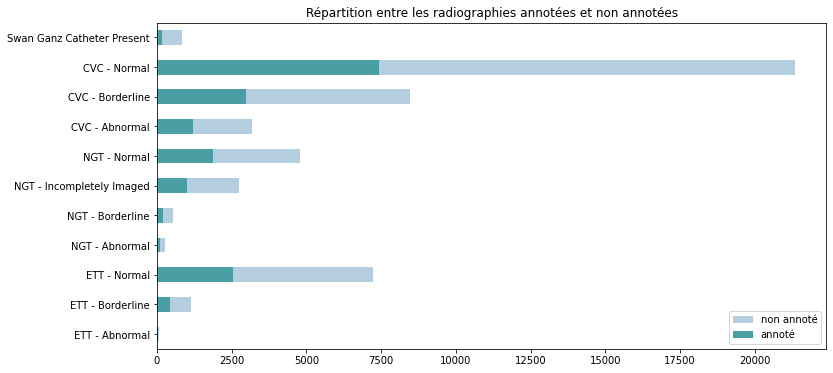

In [20]:
#Le dataset "train_annotations.csv" ne contient pas toutes les radiographies du dataset "train.csv", nous pouvons 
# donc visualiser (pour chaque classe), la part de radiographies annotées/non annotées

Classes = CLASSES = [
    'ETT - Abnormal',
    'ETT - Borderline',
    'ETT - Normal',
    'NGT - Abnormal',
    'NGT - Borderline',
    'NGT - Incompletely Imaged',
    'NGT - Normal',
    'CVC - Abnormal',
    'CVC - Borderline',
    'CVC - Normal',
    'Swan Ganz Catheter Present']


plt.figure(figsize=[12, 6])

data.apply(pd.Series.value_counts).loc[1].plot.barh(label='non annoté', color='#b4cee0')
data_annotated['label'].value_counts().reindex(Classes).plot.barh(label='annoté', color=['#499fa4'])

legend = plt.legend()
plt.title("Répartition entre les radiographies annotées et non annotées")
plt.show()

### **Tracé des annotations sur une radiographie**

In [21]:
# Cette fonction permet de tracer, à partir d'une 'StudyInstanceUID' (l'ID d'une radiographie), les annotations d'un cathéter sur l'image
# d'une radiographie
def plot_annotations(StudyInstanceUID):
    plt.figure(figsize=(8, 8))
    
    image = cv2.imread(os.path.join(BASE_DIR, "train", StudyInstanceUID + ".jpg"))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    
    df_patient = data_annotated.loc[data_annotated["StudyInstanceUID"] == StudyInstanceUID]
    
    if df_patient.shape[0]:        
        labels = df_patient["label"].values.tolist()
        lines = df_patient["data"].apply(ast.literal_eval).values.tolist()

        for line, label in zip(lines, labels):         
            line = np.asarray(line)
            plt.scatter(line[:, 0], line[:, 1], s=40, label=label)
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, prop={'size': 20})
        
    plt.tick_params(axis="x", labelsize=15)
    plt.tick_params(axis="y", labelsize=15)
    
    plt.show()

In [ ]:
image_ids = [
    "1.2.826.0.1.3680043.8.498.83331936392921199432218327504041001669",
    "1.2.826.0.1.3680043.8.498.11693509889426445054876979814173446281",
    "1.2.826.0.1.3680043.8.498.15159015355212130418020059688126994534",
    "1.2.826.0.1.3680043.8.498.53113362093090654004765263538323165995",
    "1.2.826.0.1.3680043.8.498.11986494099467532772794696144877200064",
    "1.2.826.0.1.3680043.8.498.72921907356394389969069434057117070831"
]

for image_id in image_ids:
    plot_annotations(image_id)